<a href="https://colab.research.google.com/github/joaochenriques/FFT_Testing/blob/main/FFT_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as mpl

In [2]:
# If running python on Windows operating system, copy the file:
# https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py
# to the working folder before running the notebook

import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py 

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (6,4.5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3483  100  3483    0     0  15831      0 --:--:-- --:--:-- --:--:-- 15831


In [3]:
f = 2.0
ω = 2.0 * np.pi * f 
t = np.linspace( 0, 100, 1024 )
y = np.sin( ω * t  )

In [14]:
nFFT = 1024

fsample = 1.0 / ( t[1] - t[0] )
delta_f = fsample / nFFT

fd_time = np.arange( nFFT ) / fsample
fd_data = np.copy( y[-nFFT:] )  

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


0.999511599482467

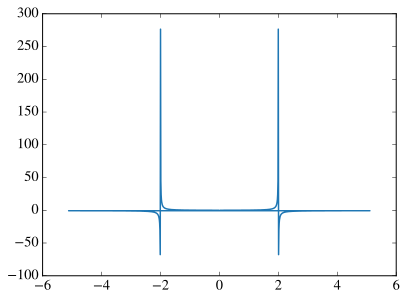

In [40]:
freqs = np.fft.fftfreq( n = nFFT, d = 1.0 / fsample )   # FFT frequencies
Amps = np.fft.fft( fd_data )                            # FFT complex amplitudes

Spec_Af  = 2.0 * np.abs( Amps ) / nFFT                  # abs amplitudes 
Spec_Var = 0.5 * Spec_Af**2                             # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                           # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f )       # mean Amplitude

mpl.plot( freqs, Amps )

Spec_A_mean

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


0.9995120739522929

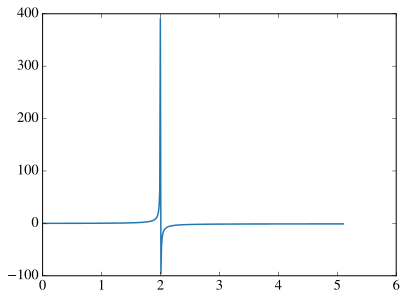

In [41]:
freqs = np.fft.rfftfreq( n = nFFT, d = 1.0 / fsample )  # FFT frequencies
Amps = np.sqrt(2) * np.fft.rfft( fd_data )              # FFT complex amplitudes

Spec_Af  = np.abs( Amps ) / (0.5*nFFT)                  # abs amplitudes 
Spec_Var = 0.5 * Spec_Af**2                             # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                           # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f )       # mean Amplitude

mpl.plot( freqs, Amps )
Spec_A_mean